In [27]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [28]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [29]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [33]:
# 3.3 CENTRE ATTACKING MIDFIELDERS

df_cam = df.loc[df['player_positions'].str.contains("CAM", case = True)]
df_cam = df_cam.reset_index(drop = True)

print(df_cam)

             short_name  age          nationality  \
0             Neymar Jr   28               Brazil   
1          K. De Bruyne   29              Belgium   
2             P. Dybala   26            Argentina   
3             J. Sancho   20              England   
4       Bruno Fernandes   25             Portugal   
...                 ...  ...                  ...   
2207        M. Nzongong   19  Republic of Ireland   
2208  Chen-Zeng Tailang   26             China PR   
2209            D. Luna   17             Colombia   
2210           M. Ćoćić   17               Serbia   
2211         S. Navarro   19             Colombia   

                          club_name  overall  potential  value_eur  wage_eur  \
0               Paris Saint-Germain       91         91   90000000    270000   
1                   Manchester City       91         91   87000000    370000   
2                          Juventus       88         89   71000000    190000   
3                 Borussia Dortmund       8

In [34]:
for i in range(0, len(df_cam['overall'])):
    if df_cam['overall'][i] > 85:
        df_cam = df_cam.drop(i)

df_cam = df_cam.reset_index(drop = True)

# remove irrelevant columns
df_cam = df_cam.drop(['defending', 'skill_fk_accuracy', 'physic', 'attacking_heading_accuracy', 'attacking_volleys', 'mentality_interceptions', 'power_jumping', 'mentality_aggression', 'power_strength', 'defending_standing_tackle', 'mentality_penalties', 'defending_sliding_tackle', 'nationality', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'release_clause_eur', 'work_rate', 'gk_reflexes', 'gk_positioning', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_speed'], axis = 1)

# for safekeeping keep the values in cam dataset
cam = df_cam

# get the top 10 rated CAMs according to their potential
df_cam = df_cam[0:10]
df_cam

,short_name,overall,potential,pace,shooting,passing,dribbling,attacking_crossing,attacking_finishing,attacking_short_passing,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_stamina,power_long_shots,mentality_positioning,mentality_vision,mentality_composure
0,K. Havertz,85,93,84.0,81.0,79.0,85.0,73,85,84,...,88,78,85,74,74,82,78,84,82,84
1,S. Milinković-Savić,85,89,69.0,79.0,80.0,83.0,64,80,85,...,72,64,83,63,83,85,80,79,85,84
2,M. Depay,85,88,86.0,83.0,81.0,84.0,83,83,81,...,87,80,82,79,87,81,83,84,84,78
3,Luis Alberto,85,86,74.0,76.0,86.0,85.0,76,77,90,...,72,81,80,74,77,75,76,80,88,78
4,H. Ziyech,85,86,80.0,76.0,87.0,84.0,88,73,86,...,77,85,84,78,83,80,77,82,89,79
5,M. Reus,85,85,80.0,86.0,84.0,85.0,85,86,85,...,78,83,85,82,87,67,83,86,84,85
6,C. Eriksen,85,85,72.0,81.0,88.0,81.0,86,77,90,...,70,77,84,80,84,92,89,82,90,86
7,J. Brandt,84,88,81.0,78.0,82.0,87.0,81,77,84,...,85,84,83,83,81,80,80,80,85,84
8,Isco,84,84,68.0,75.0,82.0,90.0,78,76,84,...,65,83,74,90,69,61,81,76,83,85
9,M. Ødegaard,83,89,78.0,75.0,84.0,85.0,84,74,83,...,77,85,74,83,76,80,78,77,87,76


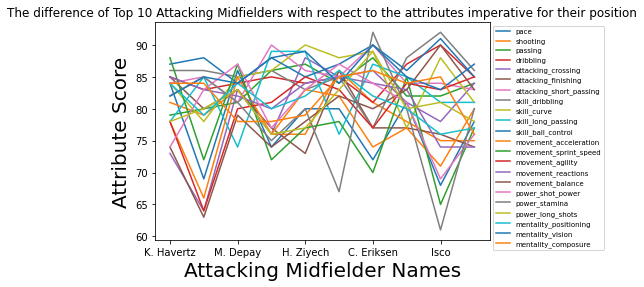

In [35]:
# plot the top 10 cams with their most associated attributes

df_cam.plot(x = 'short_name', y = ['pace', 'shooting', 'passing', 'dribbling', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_stamina', 'power_long_shots', 'mentality_positioning', 'mentality_vision', 'mentality_composure'])
plt.xlabel('Attacking Midfielder Names', fontsize = 20)
plt.ylabel('Attribute Score', fontsize = 20)
plt.title("The difference of Top 10 Attacking Midfielders with respect to the attributes imperative for their position")
plt.legend(bbox_to_anchor=(1, 1), fontsize = 7)
plt.show()


In [36]:
# get the cam names in names
names_cam = []
names_cam = pd.DataFrame(cam['short_name'])
cam = cam.drop('short_name', axis = 1)
cam = cam.drop('potential', axis = 1)
names_cam.append(df_cam['short_name'])

cam_norm = (cam - cam.mean())/cam.std()

In [37]:
# use Linear Regression to predict the overall of centre attacking midfielders
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
cam_x = cam_norm.drop('overall', axis = 1)
cam_w = cam_norm['overall']

lm.fit(cam_x,cam_w)
yhat = lm.predict(cam_x)
print(lm.intercept_)
print(lm.coef_)


-6.708807602174775e-17
[-0.09512309 -0.00208093 -0.01346255 -0.07578977  0.0588933   0.10032653
  0.18100458  0.16107951 -0.03331904  0.00809195  0.23048166  0.09767817
  0.08889423  0.01691249  0.14670235  0.0060151   0.0294756   0.04403242
  0.05468316  0.09983322  0.11442375  0.00560487]


In [38]:
# get the actual and predicted table for cams
avp = pd.DataFrame({'Actual' : cam_w, 'Predicted' : yhat})
df.sort_index(inplace=True)

add_names = avp.join(names_cam['short_name'])

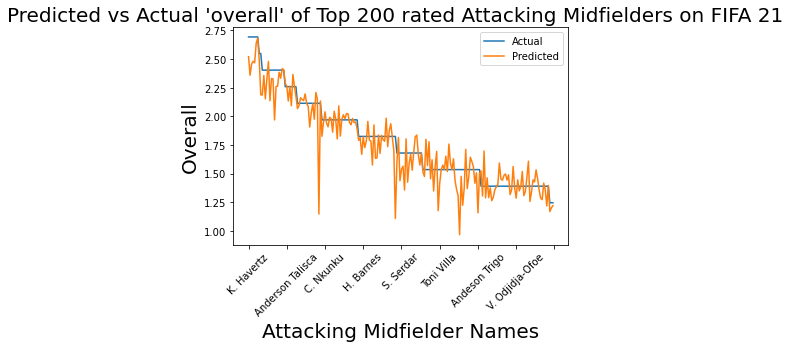

In [39]:
# plot the actual vs predicted of top 200 rated CAMs according
# to their potential

add_names[0:200].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of Top 200 rated Attacking Midfielders on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('Attacking Midfielder Names', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('Overall', fontsize = 20)
plt.show()


In [40]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(cam_w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(cam_w, yhat)))

Mean Squared Error: 0.17268151482173755
Accuracy: 0.8273184851782625


In [42]:
# accuracy for the top 500 centre attacking midfielders
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(cam_w[:500], yhat[:500])))

Accuracy: 0.8502217029774205
